In [1]:
import pandas as pd 

In [43]:
df=pd.read_csv("heart_attack_data.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


In [45]:
df.describe()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,0.52700,201.087486,130.047807,49.811244,120.312687,80.231248,0.202000,0.090000,0.182000
std,14.209466,0.49952,40.042655,30.041659,10.247178,15.507493,10.235917,0.401693,0.286325,0.386038
min,18.000000,0.00000,84.165932,36.259745,20.600644,74.433950,49.296305,0.000000,0.000000,0.000000
25%,40.000000,0.00000,174.707208,111.963197,42.622102,110.062952,73.277119,0.000000,0.000000,0.000000
50%,49.000000,1.00000,201.191547,130.678540,49.682809,120.042175,79.912592,0.000000,0.000000,0.000000
75%,59.000000,1.00000,226.251708,149.732446,56.703598,130.911804,87.084443,0.000000,0.000000,0.000000
max,94.000000,1.00000,354.660015,231.376631,82.319810,164.080967,113.848127,1.000000,1.000000,1.000000


In [46]:
df.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,1


In [47]:
df.isnull().sum()

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64

In [48]:
data_encoded = pd.get_dummies(df, columns=['sex'])
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

In [49]:
data_encoded.head()

,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack,sex_0,sex_1
0,57,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0,0,1
1,58,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0,0,1
2,37,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0,0,1
3,55,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0,0,1
4,53,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,1,0,1


In [67]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['total_cholesterol', 'ldl', 'hdl','systolic_bp', 'diastolic_bp', 'smoking','diabetes']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
data_encoded.head()


,age,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack,sex_0,sex_1
0,57,0.709003,1.526356,-1.033539,0.242420,1.089605,-0.503123,-0.314485,0,0,1
1,58,-0.365377,-0.035398,-1.450908,-1.601326,-1.551805,1.987585,-0.314485,0,0,1
2,37,1.254621,0.742667,-0.380584,-1.341529,-1.493344,-0.503123,3.179797,0,0,1
3,55,-0.225587,-0.441079,1.698652,0.138539,-0.626527,-0.503123,-0.314485,0,0,1
4,53,-1.246396,-0.766999,1.062540,0.174814,0.087060,-0.503123,3.179797,1,0,1


In [68]:
#data_encoded = data_encoded.drop(['Surname'], axis=1)

In [95]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop('heart_attack', axis=1)  
y = data_encoded['heart_attack']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)


In [96]:

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (800, 10)
Testing Features Shape: (200, 10)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg =LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)



In [110]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance Metrics:
Accuracy: 0.73
Precision: 0.39
Recall: 0.76
F1 Score: 0.52


In [99]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 656, 1: 144}


In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       162
           1       0.39      0.76      0.52        38

    accuracy                           0.73       200
   macro avg       0.66      0.74      0.67       200
weighted avg       0.83      0.73      0.76       200



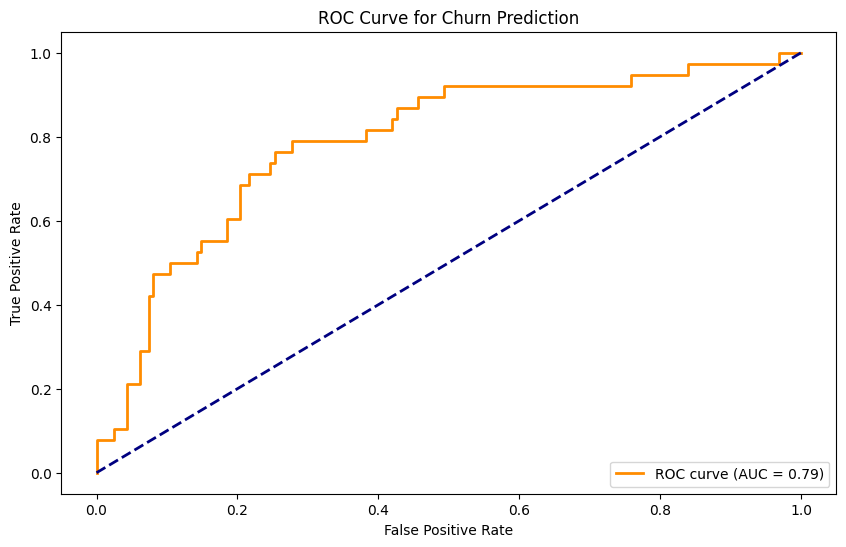

In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Churn Prediction")
plt.legend(loc="lower right")
plt.show()

In [107]:
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.7887


In [108]:
import numpy as np

# Extract feature coefficients
feature_importance = log_reg.coef_[0]

# Pair feature names with their coefficients
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
print("Top Predictive Factors for Churn:")
for feature, importance in sorted_features[:5]:
    print(f"{feature}: {importance:.4f}")

Top Predictive Factors for Churn:
diabetes: 0.3826
systolic_bp: 0.3326
total_cholesterol: 0.2948
sex_1: 0.2436
sex_0: -0.2417
